In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
data=pd.read_csv("C:/Users/DC/Downloads/loan_prediction.csv")
df=pd.DataFrame(data)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Checkind data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Label Encoder is required to transforms objects to int

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

simple imputer required to impute categorical variables and Imputer for continuous.

In [5]:
#simple Imputer
import sklearn
a=['Gender','Married','Dependents','Self_Employed']
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
for i in a:
    df[i]=si.fit_transform(df[i].values.reshape(-1,1))

b=['LoanAmount','Loan_Amount_Term','Credit_History']
si2=SimpleImputer(strategy='mean')
for j in b:
    df[j]=si2.fit_transform(df[j].values.reshape(-1,1))
    

In [6]:
#rechecking null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#LabelEncoder to change object variables to int
c=['Gender','Married','Dependents','Self_Employed','Education','Property_Area','Loan_Status']
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in c:
    df[i]=le.fit_transform(df[i].astype(str))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [8]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [9]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(int)

In [10]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Since loan id is irrelevant for modelling and for the purpose of this dataset, we can drop it

In [11]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360,1.0,2,1


In [12]:
df.shape

(614, 12)

In [13]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#description of data
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


the data has skewness and there maybe outliers present 

In [15]:
#Outliers check and treatment
from scipy.stats import zscore 
threhold=3 
z=np.abs(zscore(df)) 
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [16]:
df=df[(z<3).all(axis=1)]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360,1.0,2,1


Now the data is clean. Outliers were removed, Missing values were imputed and object variables were converted to int.

In [17]:
#shape of dataset
df.shape

(577, 12)

Skewness will be treated after univariate and bivariate analysis

In [18]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.159957,-0.104412,0.016566,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127289,0.013364,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135610,-0.083756,-0.017044,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.146598,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121892,-0.033346,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.442394,-0.050606,0.044016,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.060345,-0.019224,-0.093505,0.045009
LoanAmount,0.159957,0.165147,0.135610,-0.146598,0.121892,0.442394,0.309479,1.000000,0.040302,0.006094,-0.075749,-0.035289
Loan_Amount_Term,-0.104412,-0.127289,-0.083756,-0.094628,-0.033346,-0.050606,-0.060345,0.040302,1.000000,0.030430,-0.058990,-0.018144
Credit_History,0.016566,0.013364,-0.017044,-0.080920,-0.014899,0.044016,-0.019224,0.006094,0.030430,1.000000,-0.009747,0.561857


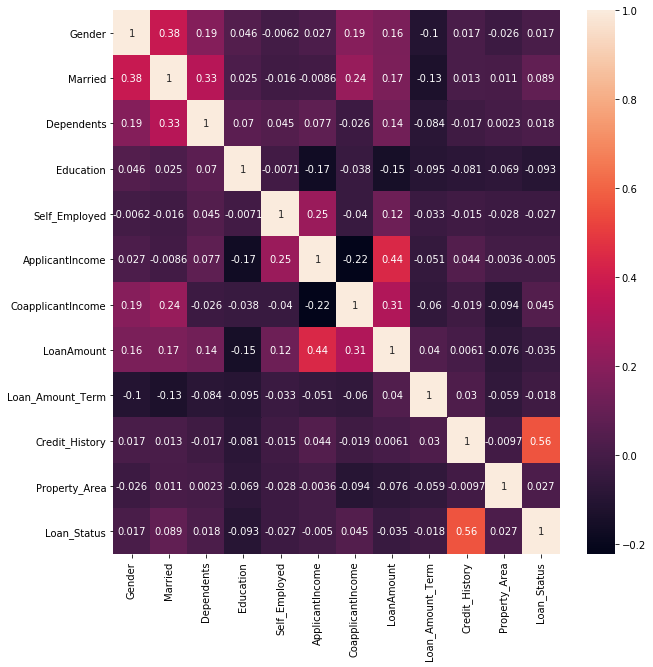

In [19]:
#Correlation 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

There is significant correlation between credit history and loan status and mediocre correlation between loan amount and applicant income

EDA-Univariate and Bivariate analysis

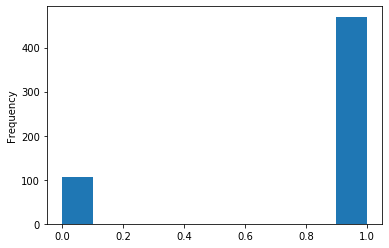

In [20]:
plt.figure()
df['Gender'].plot(kind='hist')

Majority of the applicants are 1.(Males)

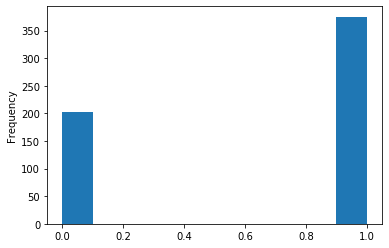

In [21]:
plt.figure()
df['Married'].plot(kind='hist')

Married=1 has the highest frequency.Most applicants are married.

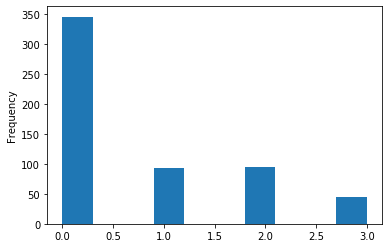

In [22]:
plt.figure()
df['Dependents'].plot(kind='hist')

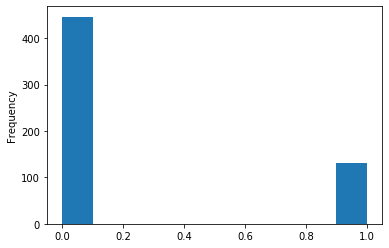

In [23]:
plt.figure()
df['Education'].plot(kind='hist')

Education=0 has the highest frequency. Most of the applicants are graduates.

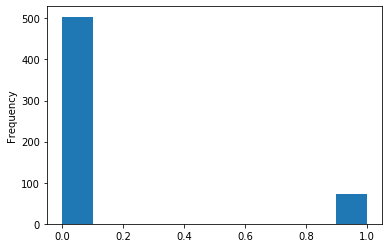

In [24]:
plt.figure()
df['Self_Employed'].plot(kind='hist')

Self employed=0 has the highest frequency. Most of the applicants are not self employed.

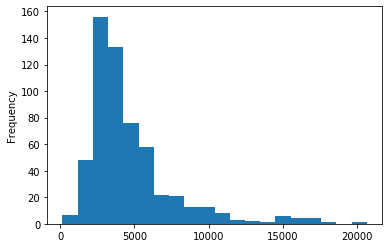

In [25]:
plt.figure()
df['ApplicantIncome'].plot(kind='hist',bins=20)

applicantincome=2500 has the highest frequency

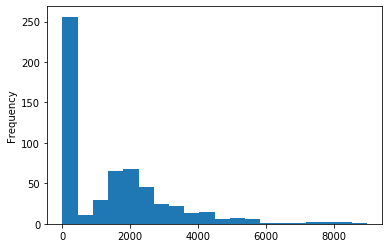

In [26]:
plt.figure()
df['CoapplicantIncome'].plot(kind='hist',bins=20)

Coapplicant income=0 has the highest frequency

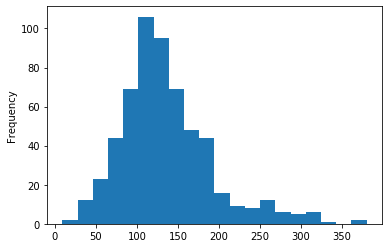

In [27]:
plt.figure()
df['LoanAmount'].plot(kind='hist',bins=20)

Loan amount=100(approx) has the highest frequency.

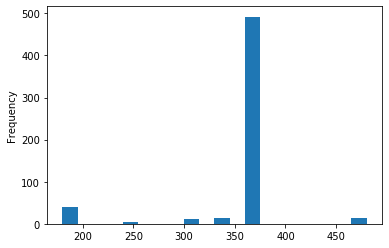

In [28]:
plt.figure()
df['Loan_Amount_Term'].plot(kind='hist',bins=20)

Loan_amount_term=360 has the highest frequency.

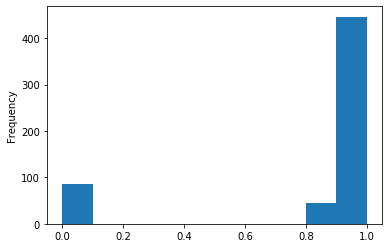

In [29]:
plt.figure()
df['Credit_History'].plot(kind='hist')

Credit history=1.0 has the highest frequency.

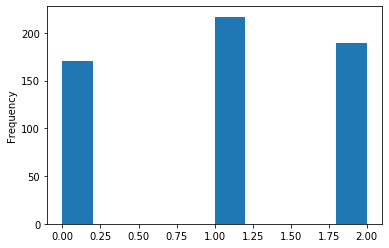

In [30]:
plt.figure()
df['Property_Area'].plot(kind='hist')

Property area=1.0 has the highest frequency

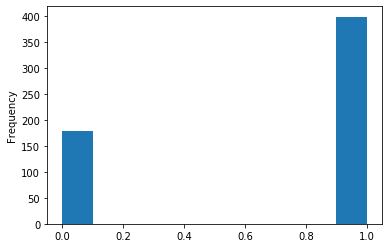

In [31]:
plt.figure()
df['Loan_Status'].plot(kind='hist')

Loan Status=1 has the highest frequency. Most of the loans were granted and this is the y variable.

<Figure size 432x288 with 0 Axes>

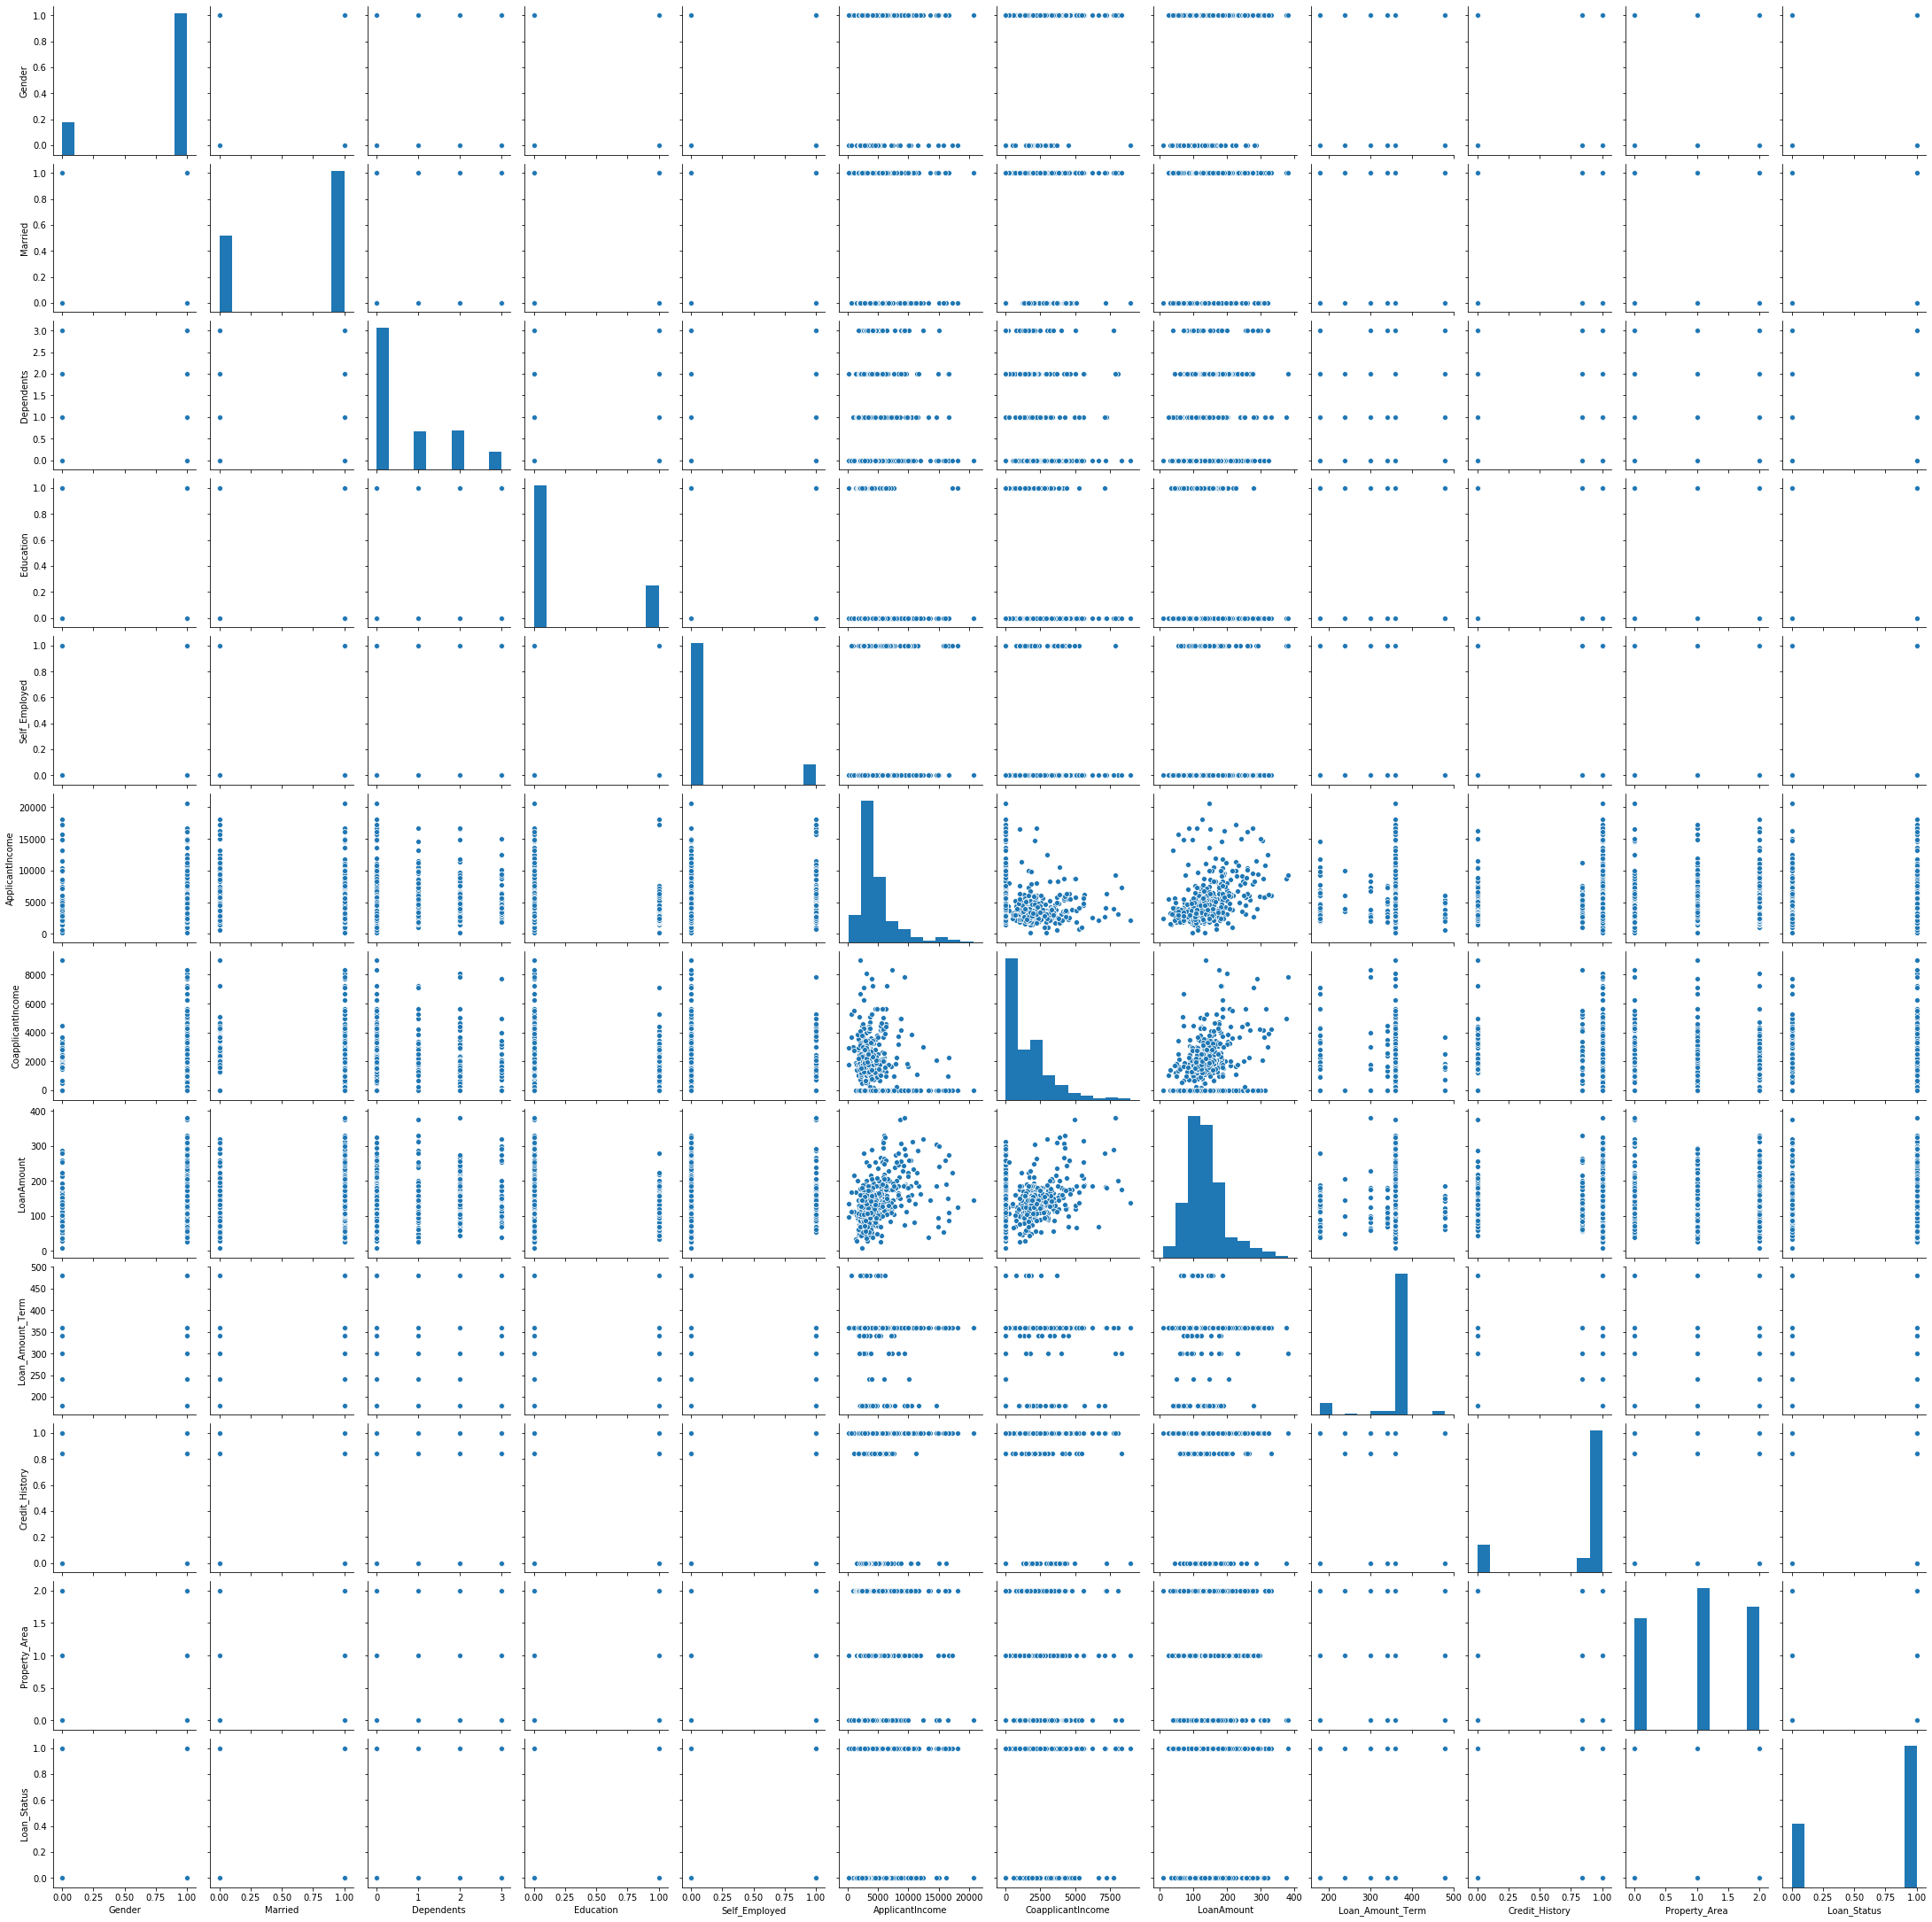

In [32]:
plt.figure()
sns.pairplot(df)

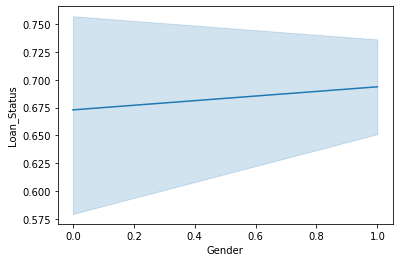

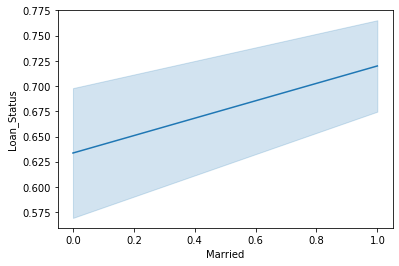

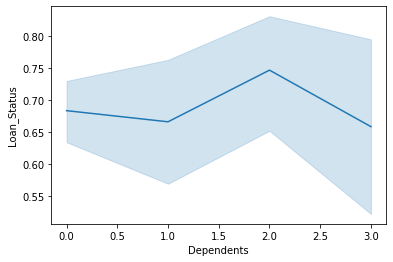

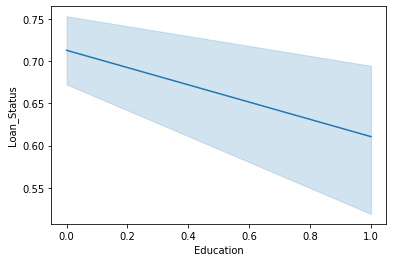

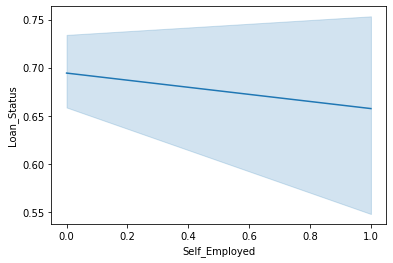

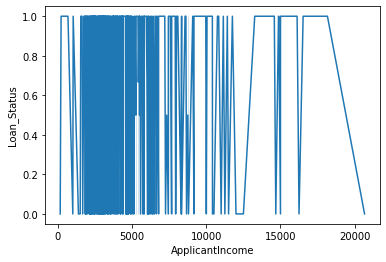

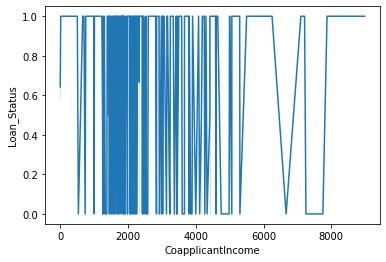

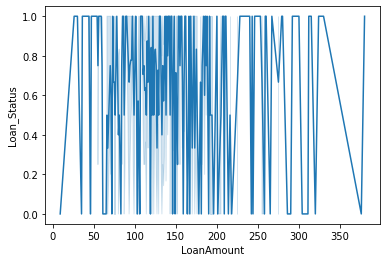

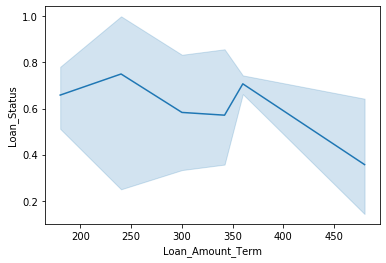

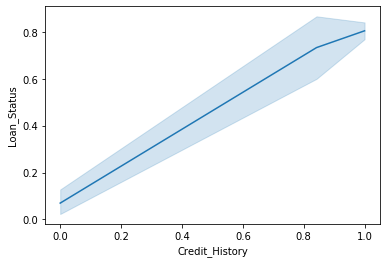

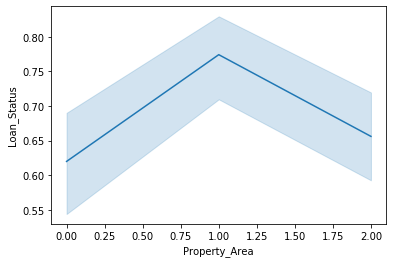

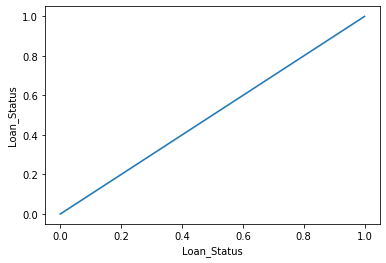

In [33]:
for i in df.columns:
    plt.figure()
    sns.lineplot(i,'Loan_Status',data=df)

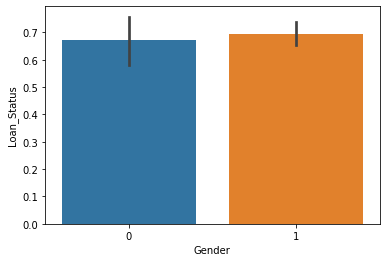

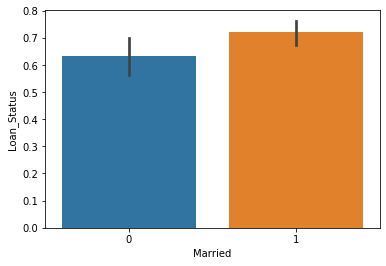

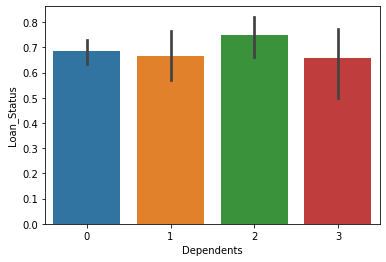

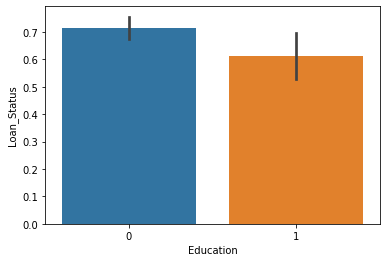

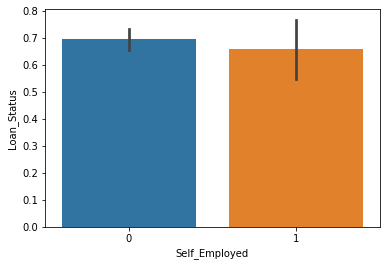

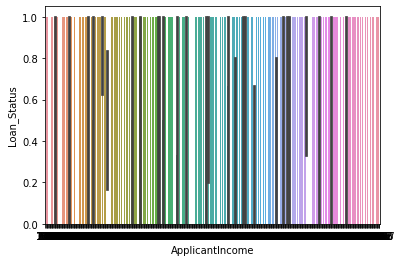

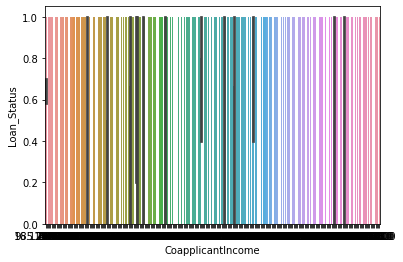

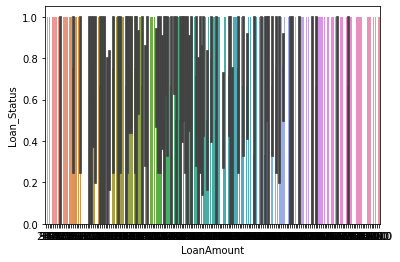

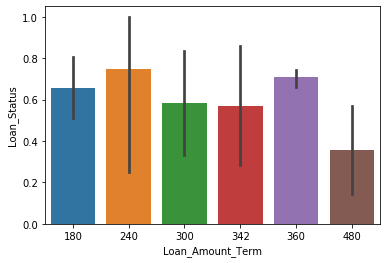

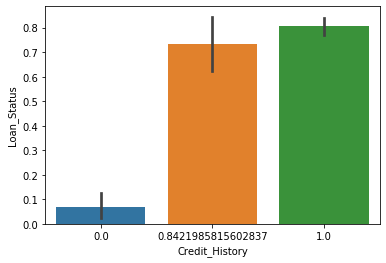

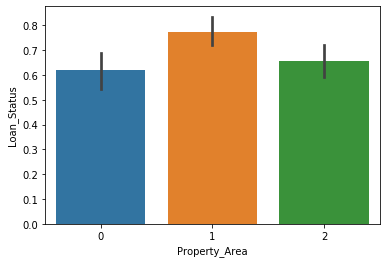

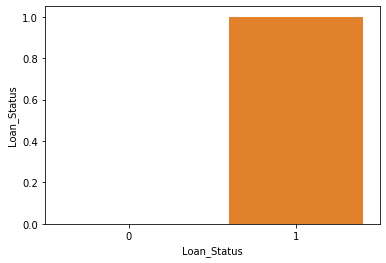

In [34]:
for i in df.columns:
    plt.figure()
    sns.barplot(i,'Loan_Status',data=df)

<Figure size 432x288 with 0 Axes>

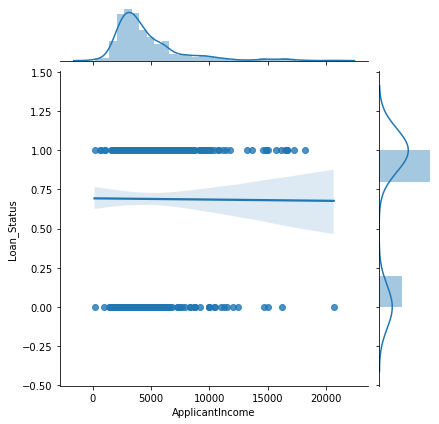

In [35]:
plt.figure()
sns.jointplot('ApplicantIncome','Loan_Status',data=df,kind='reg')

<Figure size 432x288 with 0 Axes>

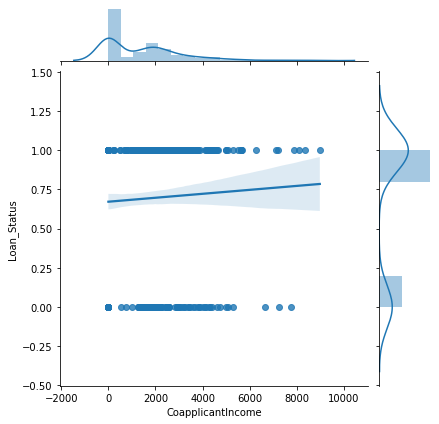

In [36]:
plt.figure()
sns.jointplot('CoapplicantIncome','Loan_Status',data=df,kind='reg')

<Figure size 432x288 with 0 Axes>

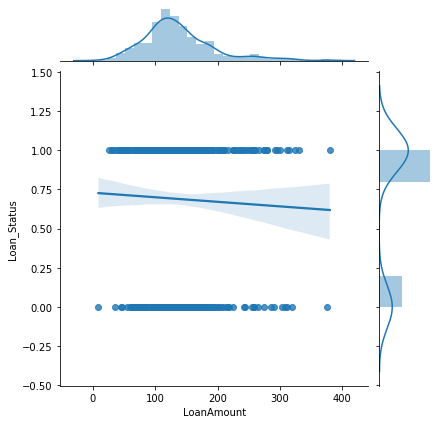

In [37]:
plt.figure()
sns.jointplot('LoanAmount','Loan_Status',data=df,kind='reg')

Males have more approved loan status than females. Married applicants have more loans granted than unmarried. dependents=2 have the highest number of loans granted but generally loan status decreses with increases in number of dependants. Graduates have more number of loans granted than non graduates. Self employed applicants have lesser loans granted than Service applicants. Applicant income have no significant effect on loan status. As coapplicant income increases there is a higher chance of getting loans granted. As loan amount increases chances of getting loans granted decreases.As loan amount term increases, chances of getting loans granted decreases. At loan amount term=240, loan status=1 is highest.Cridit history=1.0 has the highest chance of loans granted and 0 has the lowest. As credit history increases from 0 to 1, chances of getting loans granted increases. property area=1 has the highest chance of getting loans granted while property area=0 has the highest chance of getting loans rejected.

In [38]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [39]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=df[col].apply(lambda x:np.log(x+1))

In [40]:
#X Y division of dataset
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']
y=y.values.reshape(-1,1)
y.shape

(577, 1)

In [41]:
#Scaling data
import sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dx=scale.fit_transform(x)
x=pd.DataFrame(dx,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.688861,-1.127469,0.369286,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.573759,-0.541961,-0.380580,0.249082,0.780679,0.055093,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.775143,-0.541961,2.627567,-0.514859,-1.127469,-1.487655,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.775143,1.845150,-0.380580,-0.784651,0.897159,-0.095673,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.734818,-1.127469,0.281199,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.775143,-0.541961,-0.380580,-0.575974,-1.127469,-1.318164,0.239408,0.456461,-1.306522
573,0.477137,0.733939,1.922662,-0.541961,-0.380580,0.050933,-1.127469,-2.644201,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.573759,-0.541961,-0.380580,1.269687,0.302441,1.650597,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.362817,-0.541961,-0.380580,1.157006,-1.127469,0.942022,0.239408,0.456461,1.227472


Modelling-Since y variable is categorical classification is used

In [42]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [43]:
# getting the best random state for train test split
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        accuracy=accuracy_score(ytest,ypred)

        if accuracy>max_score:
            max_score=accuracy
            final_r_state=r_state
    print(max_score,'is max accuracy against r_state',final_r_state)

In [44]:
logr=LogisticRegression()
max_score(logr)

0.896551724137931 is max accuracy against r_state 91


In [45]:
#finding best parameters for knn
algo=KNeighborsClassifier()
para={'n_neighbors':[3,5,7,9,11]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'n_neighbors': 9}


In [46]:
knc=KNeighborsClassifier(n_neighbors=9)
max_score(knc)

0.8793103448275862 is max accuracy against r_state 91


In [47]:
algo=SVC()
para={'kernel':['rbf','poly','linear'],'C':[1,10]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [48]:
svc=SVC(kernel='linear',C=1)
max_score(svc)

0.896551724137931 is max accuracy against r_state 91


In [49]:
algo=DecisionTreeClassifier()
para={'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'criterion': 'gini'}


In [50]:
dtc=DecisionTreeClassifier(criterion='gini')
max_score(dtc)

0.7758620689655172 is max accuracy against r_state 72


In [51]:
algo=RandomForestClassifier()
para={'n_estimators':[50,100,150,200,500]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'n_estimators': 50}


In [52]:
rfc=RandomForestClassifier(n_estimators=50)
max_score(rfc)

0.8706896551724138 is max accuracy against r_state 95


In [53]:
#using Boosting to improve accuracy
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [54]:
algo=AdaBoostClassifier()
para={'n_estimators':[50,100,150,200,500],'base_estimator':[svc,logr,knc,dtc,rfc]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'n_estimators': 50}


In [55]:
ad=AdaBoostClassifier(n_estimators=50,base_estimator=logr)
max_score(ad)

0.896551724137931 is max accuracy against r_state 91


In [56]:
algo=GradientBoostingClassifier()
para={'learning_rate':[1,0.1,0.01,0.001,0]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'learning_rate': 0.01}


In [57]:
gdb=GradientBoostingClassifier(learning_rate=0.01)
max_score(gdb)

0.896551724137931 is max accuracy against r_state 91


In [58]:
models=[]
models.append(('Logistic Regression',logr,91))
models.append(('Support Vector Classifier',svc,91))
models.append(('KNeighborsClassifier',knc,95))
models.append(('Decision tree Classifier',dtc,72))
models.append(('RandomForest Classifier',rfc,95))
models.append(('AdaBoost Classifier',ad,91))
models.append(('Gradient Boosting Classifier',gdb,91))

Models=[]
Accuracy=[]
Cvs=[]
Roc_score=[]

*********** Logistic Regression ************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score= 0.896551724137931


Cross Validation Score= 0.8180809595202397


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        28
           1       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116



[[16 12]
 [ 0 88]]
Roc score= 0.7857142857142857


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** Support Vector Classifier ************


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coe

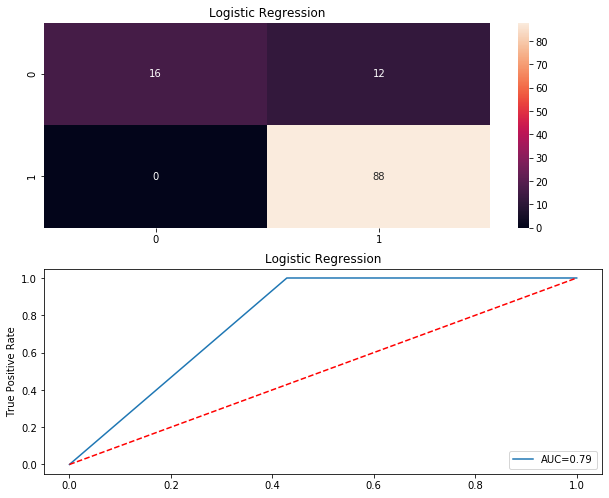

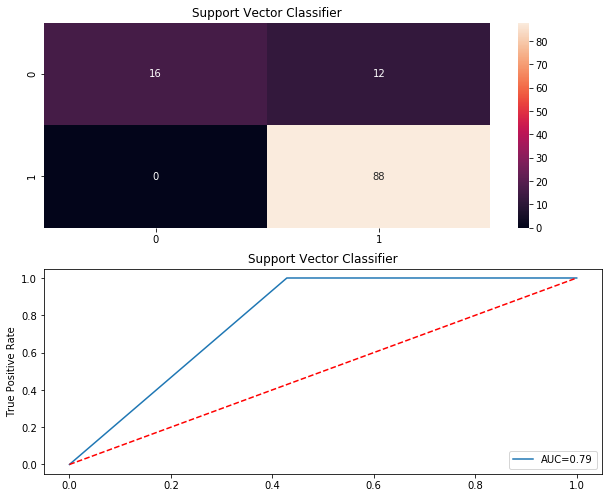

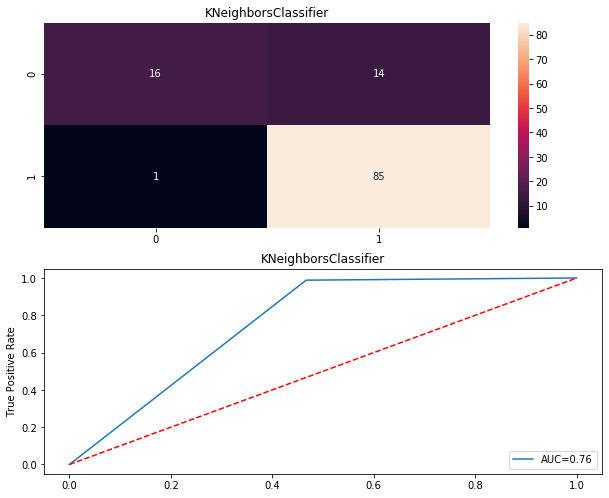

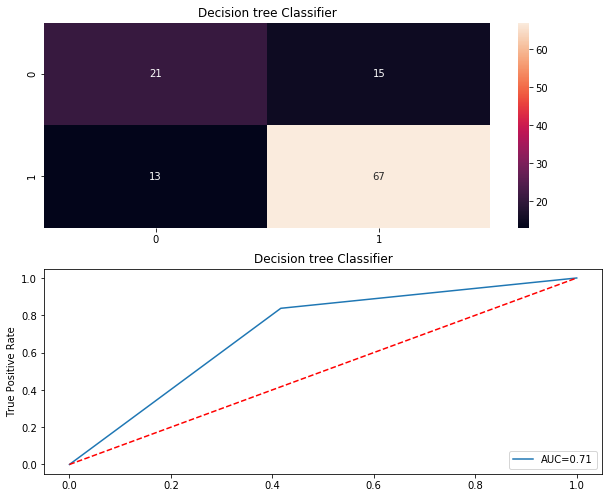

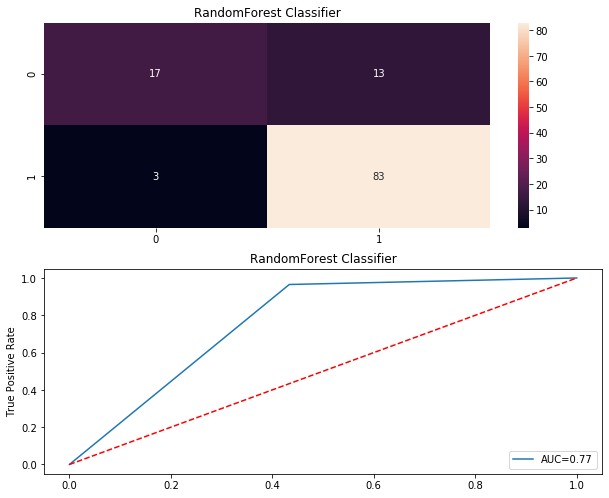

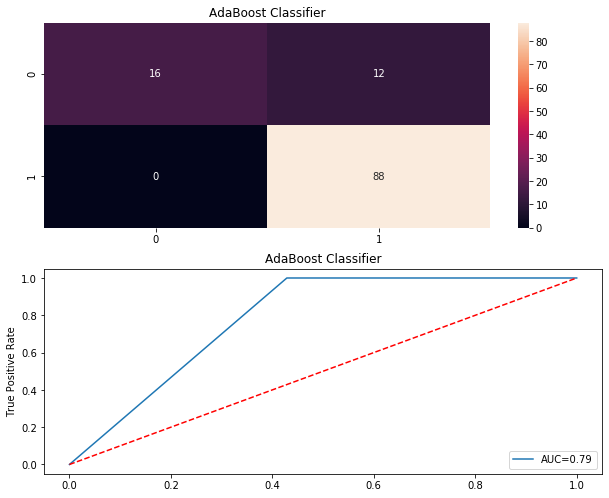

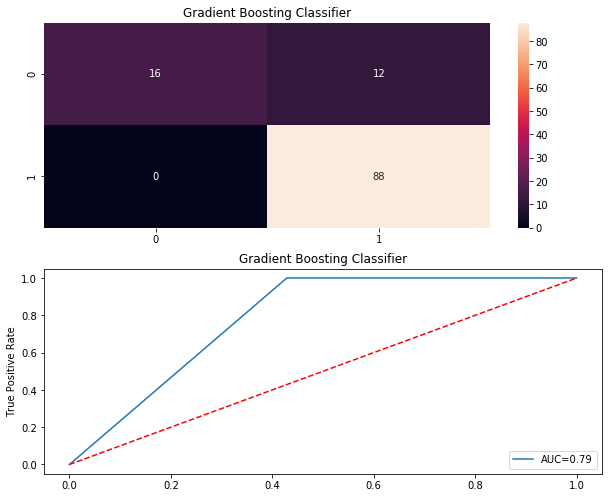

In [59]:
for name,model,randomstate in models:
    print('***********',name,'************')
    print('\n')
    Models.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    Ac=accuracy_score(ytest,pred)
    print('Accuracy score=',Ac)
    Accuracy.append(Ac*100)
    print('\n')
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score=',cvs)
    Cvs.append(cvs)
    print('\n')
    Cr=classification_report(ytest,pred)
    print(Cr)
    print('\n')
    cm=confusion_matrix(ytest,pred)
    print(cm)
    fpr,tpr,threshold=roc_curve(ytest,pred)
    roc_auc=auc(fpr,tpr)
    print('Roc score=',roc_auc)
    Roc_score.append(roc_auc)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    
    print('\n\n')

In [60]:
Result=pd.DataFrame({'Models':Models,'Accuracy':Accuracy,'Cross Validation Score':Cvs,'Roc_Score':Roc_score})
Result

,Models,Accuracy,Cross Validation Score,Roc_Score
0,Logistic Regression,89.655172,0.818081,0.785714
1,Support Vector Classifier,89.655172,0.818081,0.785714
2,KNeighborsClassifier,87.068966,0.809415,0.760853
3,Decision tree Classifier,75.862069,0.707166,0.710417
4,RandomForest Classifier,86.206897,0.797241,0.765891
5,AdaBoost Classifier,89.655172,0.814603,0.785714
6,Gradient Boosting Classifier,89.655172,0.807706,0.785714


The logistic regression,support vector classifier and adaboost classifier shows similar accuracy,cross validation score and roc score.

In [61]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svc,'svc.Loan.obj')
joblib.dump(logr,'logr.Loan.obj')

['logr.Loan.obj']